**Étape 1 : Préparer l'environnement de travail**

In [3]:
!pip install datasets transformers torch torchvision scikit-learn tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


**Chargement des données**

In [6]:
import pandas as pd

# Chemin vers le fichier téléversé
file_path = "/content/coarse-and-fine-grained-ner-dataset.csv"


# Charger les données
data = pd.read_csv(file_path)

# Afficher un aperçu des données
print(data.head())

                                                Text  \
0   grandes feuilles opposées, oblongues-elliptiq...   
1   feuilles opposées, groupées à l'extrémité des...   
2   feuilles opposées, obovées oblongues, arrondi...   
3   arbustes  petites feuilles opposées, groupées...   
4   arbustes  feuilles opposées ou alternes, obla...   

                                      Organ Entities  \
0  ['bouton', 'pédicelle', 'corolle', 'tube', 'fe...   
1  ['limbe', 'style', 'filets', 'rameaux', 'sépal...   
2  ['corolle', 'limbe', 'ovaire', 'lobes', 'base'...   
3  ['anthères', 'pétales', 'tube', 'feuilles', 's...   
4  ['base', 'nervure', 'feuilles', 'arbustes', 'l...   

                                 Descriptor Entities  \
0  ['fermée', 'pubes-cents', 'cunéiformes', 'vent...   
1  ['elliptiques', '1 cm de longueur', 'extrorses...   
2  ['cunéiforme', '10,5 mm de longueur', 'long', ...   
3  ['secondaires', 'accusé', 'saillantes', 'apicu...   
4  ['proéminente', 'décurrente', 'alternes', '

In [7]:
# Afficher les colonnes
print(data.columns)

# Afficher quelques lignes
print(data.sample(5))


Index(['Text', 'Organ Entities', 'Descriptor Entities',
       'Coarse-grained Annotation', 'Fine-grained Annotation'],
      dtype='object')
                                                  Text  \
808   & tirel : a, rameau florifère ; b, bractée ; ...   
749   herbe annuelle parfois un peu vivace, pubérul...   
604   sous-arbrisseau ou arbuste de 0,5-2 m, entièr...   
222   sous-arbrisseau ou arbuste jusqu'à 2 m de hau...   
566   feuilles échelonnées le long des tiges, à ent...   

                                        Organ Entities  \
808  ['fleur', 'étamine', 'étamine', 'rameau', 'fle...   
749  ['silicules', 'bords', 'étamines', 'feuilles',...   
604  ['inflorescences', 'styles', 'limbe', 'grappes...   
222  ['écorce', 'inflorescences', 'fleurs', 'limbe'...   
566  ['rameau', 'cymes', 'sinus', 'fleurs', 'base',...   

                                   Descriptor Entities  \
808  ['florifère', 'longitudinale', 'dorsale', 'sté...   
749  ['pennatifides', 'nombreuses', 'ascenda

**1. Aperçu du Dataset**

In [8]:
# Taille du dataset
print(f"Taille du dataset : {data.shape}")

# Exemple de quelques lignes
print(data.head())

# Statistiques de base
print(data.describe(include='all'))


Taille du dataset : (838, 5)
                                                Text  \
0   grandes feuilles opposées, oblongues-elliptiq...   
1   feuilles opposées, groupées à l'extrémité des...   
2   feuilles opposées, obovées oblongues, arrondi...   
3   arbustes  petites feuilles opposées, groupées...   
4   arbustes  feuilles opposées ou alternes, obla...   

                                      Organ Entities  \
0  ['bouton', 'pédicelle', 'corolle', 'tube', 'fe...   
1  ['limbe', 'style', 'filets', 'rameaux', 'sépal...   
2  ['corolle', 'limbe', 'ovaire', 'lobes', 'base'...   
3  ['anthères', 'pétales', 'tube', 'feuilles', 's...   
4  ['base', 'nervure', 'feuilles', 'arbustes', 'l...   

                                 Descriptor Entities  \
0  ['fermée', 'pubes-cents', 'cunéiformes', 'vent...   
1  ['elliptiques', '1 cm de longueur', 'extrorses...   
2  ['cunéiforme', '10,5 mm de longueur', 'long', ...   
3  ['secondaires', 'accusé', 'saillantes', 'apicu...   
4  ['proéminente'

**2. Distribution des Longueurs des Textes**

count    838.000000
mean     201.811456
std      128.492529
min        5.000000
25%      108.000000
50%      189.000000
75%      265.000000
max      985.000000
Name: Text_Length, dtype: float64


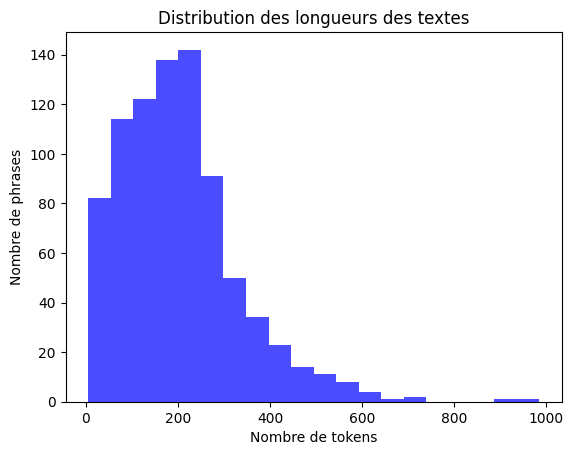

In [9]:
# Calculer la longueur de chaque phrase
data['Text_Length'] = data['Text'].apply(lambda x: len(x.split()))

# Afficher les statistiques
print(data['Text_Length'].describe())

# Visualiser la distribution des longueurs
import matplotlib.pyplot as plt

plt.hist(data['Text_Length'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution des longueurs des textes')
plt.xlabel('Nombre de tokens')
plt.ylabel('Nombre de phrases')
plt.show()


**3. Distribution des Entités**

Répartition des entités : Counter({'ORGANE': 22251, 'DESCRIPTEUR': 18543})


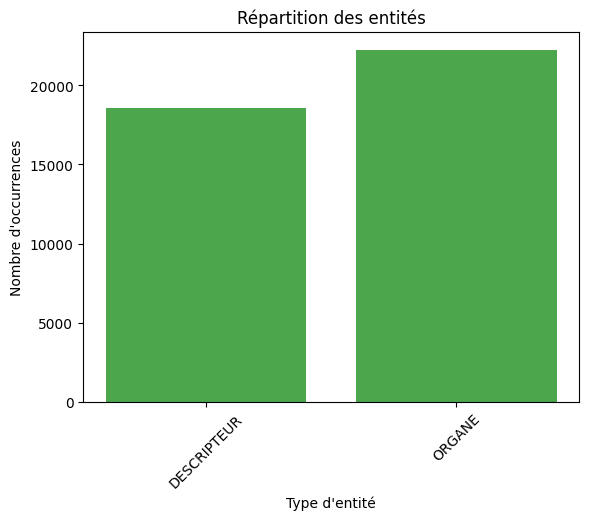

In [10]:
from collections import Counter

# Compter les entités dans Coarse-grained Annotation
entity_counts = Counter()

for annotations in data['Coarse-grained Annotation']:
    entities = eval(annotations)  # Convertir la chaîne en liste
    for _, _, label in entities:
        entity_counts[label] += 1

# Afficher la répartition
print("Répartition des entités :", entity_counts)

# Visualiser les entités
plt.bar(entity_counts.keys(), entity_counts.values(), color='green', alpha=0.7)
plt.title('Répartition des entités')
plt.xlabel('Type d\'entité')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()


**4. Exemple d'Annotations**

In [11]:
# Exemple d'une phrase et ses annotations
example_row = data.iloc[0]
print("Texte :", example_row['Text'])
print("Annotations :", eval(example_row['Coarse-grained Annotation']))


Texte :  grandes feuilles opposées, oblongues-elliptiques ou obovées-elliptiques, arrondies au sommet, obtuses ou cunéiformes à la base  limbe glabre, mesurant jusqu'à 20 cm de longueur sur 12 cm de largeur  nervure médiane proéminente dessous, un peu saillante dessus  nervures secondaires, 5 à 10 paires, incurvées, réunies en arceaux assez loin de la marge, saillantes dessous, bien marquées dessus, anastomosées à un réseau de nervilles à grosses mailles irrégulières, finement saillant dessus  pétiole 5-20 mm  fleurs blanches fasciculées sur le vieux bois  pédicelle 4-6 mm, glabre ou légèrement pubescent  galice : 4 sépales (2 + 2) de 2,5 mm, un peu pubes-cents extérieurement  corolle à 8 lobes de 3 mm; tube 2 mm  ëtamines 8, insérées à la gorge; filets 3 mm  ovaire velu, à 4 loges, prolongé d'un long style glabre  dans le bouton la corolle, étroitement fermée, laisse poindre très apparemment le style  fruits inconnus  le spécimen type renferme une seule graine fusiforme non carénée, d

**5. Vérification des Données**

In [12]:
# Vérifier les textes vides
missing_texts = data[data['Text'].isnull()]
print(f"Nombre de textes vides : {len(missing_texts)}")

# Vérifier les annotations vides
missing_annotations = data[data['Coarse-grained Annotation'].isnull()]
print(f"Nombre d'annotations vides : {len(missing_annotations)}")


Nombre de textes vides : 0
Nombre d'annotations vides : 0


**6. Distribution des Longueurs des Entités**

count    40794.000000
mean         7.701329
std          2.995699
min          3.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         27.000000
dtype: float64


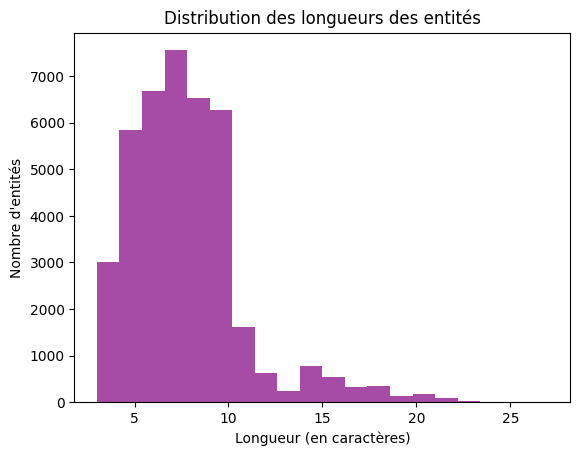

In [13]:
entity_lengths = []

for annotations in data['Coarse-grained Annotation']:
    entities = eval(annotations)
    for start, end, _ in entities:
        entity_lengths.append(end - start)

# Afficher les statistiques
print(pd.Series(entity_lengths).describe())

# Visualiser la distribution des longueurs des entités
plt.hist(entity_lengths, bins=20, color='purple', alpha=0.7)
plt.title('Distribution des longueurs des entités')
plt.xlabel('Longueur (en caractères)')
plt.ylabel('Nombre d\'entités')
plt.show()


**Préparation des Données**

In [14]:
sentences = []
tags = []

# Parcourir les lignes du dataset
for _, row in data.iterrows():
    text = row['Text']  # Texte brut
    annotations = eval(row['Coarse-grained Annotation'])  # Annotations

    # Diviser le texte en tokens (mots)
    tokens = text.split()  # Séparation par espaces
    token_tags = ['O'] * len(tokens)  # Initialiser toutes les étiquettes à "O"

    # Appliquer les annotations
    for start, end, label in annotations:
        for i, token in enumerate(tokens):
            # Calculer les positions du token dans le texte
            token_start = text.find(token)
            token_end = token_start + len(token)

            # Vérifier si le token correspond à une entité annotée
            if start <= token_start < end:
                if token_tags[i] == 'O':  # Si le token n'a pas encore d'étiquette
                    token_tags[i] = f"B-{label}"  # Début de l'entité
                else:
                    token_tags[i] = f"I-{label}"  # Intérieur de l'entité

    sentences.append(tokens)
    tags.append(token_tags)

# Exemple d'une phrase et ses étiquettes
print("Exemple de tokens :", sentences[0])
print("Exemple de tags :", tags[0])


Exemple de tokens : ['grandes', 'feuilles', 'opposées,', 'oblongues-elliptiques', 'ou', 'obovées-elliptiques,', 'arrondies', 'au', 'sommet,', 'obtuses', 'ou', 'cunéiformes', 'à', 'la', 'base', 'limbe', 'glabre,', 'mesurant', "jusqu'à", '20', 'cm', 'de', 'longueur', 'sur', '12', 'cm', 'de', 'largeur', 'nervure', 'médiane', 'proéminente', 'dessous,', 'un', 'peu', 'saillante', 'dessus', 'nervures', 'secondaires,', '5', 'à', '10', 'paires,', 'incurvées,', 'réunies', 'en', 'arceaux', 'assez', 'loin', 'de', 'la', 'marge,', 'saillantes', 'dessous,', 'bien', 'marquées', 'dessus,', 'anastomosées', 'à', 'un', 'réseau', 'de', 'nervilles', 'à', 'grosses', 'mailles', 'irrégulières,', 'finement', 'saillant', 'dessus', 'pétiole', '5-20', 'mm', 'fleurs', 'blanches', 'fasciculées', 'sur', 'le', 'vieux', 'bois', 'pédicelle', '4-6', 'mm,', 'glabre', 'ou', 'légèrement', 'pubescent', 'galice', ':', '4', 'sépales', '(2', '+', '2)', 'de', '2,5', 'mm,', 'un', 'peu', 'pubes-cents', 'extérieurement', 'corolle',

**Vérification des Alignements**

In [15]:
for idx, (sentence, tag) in enumerate(zip(sentences, tags)):
    assert len(sentence) == len(tag), f"Problème d'alignement à la phrase {idx}"
print("Tous les tokens et tags sont alignés correctement.")


Tous les tokens et tags sont alignés correctement.


**Sauvegarder les Données Prétraitées**

In [16]:
import os
import pickle

# Créer un répertoire pour les données prétraitées
processed_dir = "ner_project/data/processed"
os.makedirs(processed_dir, exist_ok=True)

# Sauvegarder les sentences et les tags
with open(f"{processed_dir}/sentences.pkl", "wb") as f:
    pickle.dump(sentences, f)
with open(f"{processed_dir}/tags.pkl", "wb") as f:
    pickle.dump(tags, f)

print("Données sauvegardées avec succès dans le répertoire processed.")


Données sauvegardées avec succès dans le répertoire processed.


**Préparer les Étiquettes (Tags)**

In [17]:
# Extraire toutes les étiquettes uniques
unique_tags = set(tag for tag_list in tags for tag in tag_list)
tag2id = {tag: idx for idx, tag in enumerate(sorted(unique_tags))}
id2tag = {idx: tag for tag, idx in tag2id.items()}

# Afficher le mapping
print("Mapping des étiquettes :", tag2id)

# Transformer les tags en IDs
tags_as_ids = [[tag2id[tag] for tag in tag_list] for tag_list in tags]


Mapping des étiquettes : {'B-DESCRIPTEUR': 0, 'B-ORGANE': 1, 'I-DESCRIPTEUR': 2, 'I-ORGANE': 3, 'O': 4}


**Gestion des Textes Longs**

In [18]:
max_len = 512
truncated_sentences = [sentence[:max_len] for sentence in sentences]
truncated_tags = [tag_list[:max_len] for tag_list in tags_as_ids]

print(f"Nombre de phrases après troncature : {len(truncated_sentences)}")


Nombre de phrases après troncature : 838


**Préparer pour le Modèle**

In [19]:
def pad_sequences(sequences, pad_token, max_len=None):
    # Déterminer la longueur maximale
    max_len = max_len if max_len else max(len(seq) for seq in sequences)

    # Ajouter le padding
    padded_sequences = [
        seq + [pad_token] * (max_len - len(seq)) for seq in sequences
    ]
    return padded_sequences, max_len

# Ajouter du padding aux phrases et étiquettes
padded_sentences, max_len = pad_sequences(truncated_sentences, pad_token="<PAD>")
padded_tags, _ = pad_sequences(truncated_tags, pad_token=tag2id["O"], max_len=max_len)

print(f"Longueur maximale après padding : {max_len}")
print(f"Exemple de phrase paddée : {padded_sentences[0]}")
print(f"Exemple d'étiquettes paddées : {padded_tags[0]}")


Longueur maximale après padding : 512
Exemple de phrase paddée : ['grandes', 'feuilles', 'opposées,', 'oblongues-elliptiques', 'ou', 'obovées-elliptiques,', 'arrondies', 'au', 'sommet,', 'obtuses', 'ou', 'cunéiformes', 'à', 'la', 'base', 'limbe', 'glabre,', 'mesurant', "jusqu'à", '20', 'cm', 'de', 'longueur', 'sur', '12', 'cm', 'de', 'largeur', 'nervure', 'médiane', 'proéminente', 'dessous,', 'un', 'peu', 'saillante', 'dessus', 'nervures', 'secondaires,', '5', 'à', '10', 'paires,', 'incurvées,', 'réunies', 'en', 'arceaux', 'assez', 'loin', 'de', 'la', 'marge,', 'saillantes', 'dessous,', 'bien', 'marquées', 'dessus,', 'anastomosées', 'à', 'un', 'réseau', 'de', 'nervilles', 'à', 'grosses', 'mailles', 'irrégulières,', 'finement', 'saillant', 'dessus', 'pétiole', '5-20', 'mm', 'fleurs', 'blanches', 'fasciculées', 'sur', 'le', 'vieux', 'bois', 'pédicelle', '4-6', 'mm,', 'glabre', 'ou', 'légèrement', 'pubescent', 'galice', ':', '4', 'sépales', '(2', '+', '2)', 'de', '2,5', 'mm,', 'un', 'peu'

In [20]:
from torch.utils.data import Dataset
class NERDataset(Dataset):
    def __init__(self, sentences, tags):
        self.sentences = sentences
        self.tags = tags

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.sentences[idx], dtype=torch.long),
            'labels': torch.tensor(self.tags[idx], dtype=torch.long),
        }

# Créer un dataset avec les données paddées
ner_dataset = NERDataset(padded_sentences, padded_tags)


In [21]:
# Vérifier les types des données
print(f"Type des sentences : {type(padded_sentences[0][0])}")
print(f"Type des tags : {type(padded_tags[0][0])}")


Type des sentences : <class 'str'>
Type des tags : <class 'int'>


**Convertir les Tokens en Indices**

In [22]:
from transformers import AutoTokenizer

# Charger le tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Convertir les tokens en indices
padded_sentences = [
    tokenizer.convert_tokens_to_ids(sentence) for sentence in padded_sentences
]

# Vérifier après conversion
print(f"Type des sentences après conversion : {type(padded_sentences[0][0])}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Type des sentences après conversion : <class 'int'>


Création du nouveau Dataset

In [23]:
# Créer le Dataset avec les nouvelles données
ner_dataset = NERDataset(padded_sentences, padded_tags)


In [24]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    input_ids = torch.stack([torch.tensor(item['input_ids'], dtype=torch.long) for item in batch])
    labels = torch.stack([torch.tensor(item['labels'], dtype=torch.long) for item in batch])
    return {'input_ids': input_ids, 'labels': labels}


In [25]:

import torch
# Créer le DataLoader
batch_size = 16
dataloader = DataLoader(ner_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

# Vérifier un batch
for batch in dataloader:
    print("Exemple de batch :", batch)
    break


Exemple de batch : {'input_ids': tensor([[  100,   100,  1260,  ...,   100,   100,   100],
        [  100,  1260,   100,  ...,   100,   100,   100],
        [  100,   100,   100,  ...,   100,   100,   100],
        ...,
        [  100, 20796,   100,  ...,   100,   100,   100],
        [  100, 20796,   100,  ...,   100,   100,  1260],
        [  100,   100,   100,  ...,   100,   100,   100]]), 'labels': tensor([[1, 4, 4,  ..., 4, 4, 4],
        [1, 4, 4,  ..., 4, 4, 4],
        [1, 4, 4,  ..., 4, 4, 4],
        ...,
        [1, 4, 1,  ..., 4, 4, 4],
        [1, 4, 1,  ..., 4, 0, 4],
        [1, 4, 0,  ..., 4, 4, 4]])}


<ipython-input-24-439e10b7745d>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.stack([torch.tensor(item['input_ids'], dtype=torch.long) for item in batch])
<ipython-input-24-439e10b7745d>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.stack([torch.tensor(item['labels'], dtype=torch.long) for item in batch])


In [26]:
def collate_fn(batch):
    input_ids = torch.stack([item['input_ids'].clone().detach() for item in batch])
    labels = torch.stack([item['labels'].clone().detach() for item in batch])
    return {'input_ids': input_ids, 'labels': labels}


In [27]:
# Créer le DataLoader
batch_size = 16
dataloader = DataLoader(ner_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

# Vérifier un batch
for batch in dataloader:
    print("Exemple de batch :", batch)
    break


Exemple de batch : {'input_ids': tensor([[ 100,  100, 1260,  ...,  100,  100,  100],
        [ 100,  100,  132,  ...,  100,  100,  100],
        [ 100, 1260,  100,  ...,  100,  100,  100],
        ...,
        [ 100,  100, 1260,  ...,  100,  100,  100],
        [ 100,  246,  100,  ...,  100,  100,  100],
        [ 100, 1260,  100,  ...,  100,  100,  100]]), 'labels': tensor([[1, 4, 4,  ..., 4, 4, 4],
        [1, 0, 4,  ..., 4, 4, 4],
        [1, 4, 4,  ..., 4, 4, 4],
        ...,
        [4, 0, 4,  ..., 4, 4, 4],
        [1, 4, 1,  ..., 4, 4, 4],
        [1, 4, 4,  ..., 4, 4, 4]])}


**Définir le Modèle LSTM**

In [28]:
import torch.nn as nn

class LSTMNERModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx):
        super(LSTMNERModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 because bidirectional
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids):
        embedded = self.embedding(input_ids)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out)
        logits = self.fc(lstm_out)
        return logits


**Initialiser le Modèle**

In [29]:
# Dimensions
vocab_size = len(tokenizer.get_vocab())  # Taille du vocabulaire
embedding_dim = 128  # Taille des embeddings
hidden_dim = 256  # Taille des unités cachées du LSTM
output_dim = len(tag2id)  # Nombre d'étiquettes
pad_idx = tokenizer.pad_token_id  # Indice du token PAD

# Modèle
model = LSTMNERModel(vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx)


**Définir la Fonction de Perte et l’Optimiseur**

In [30]:
import torch
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


**Boucle d’Entraînement**

In [31]:
# Entraînement
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for batch in dataloader:
        input_ids = batch['input_ids']
        labels = batch['labels']

        optimizer.zero_grad()
        logits = model(input_ids)

        # Calculer la perte
        loss = criterion(logits.view(-1, logits.shape[-1]), labels.view(-1))
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Époque {epoch+1}/{num_epochs}, Perte : {epoch_loss/len(dataloader)}")


Époque 1/5, Perte : 0.2741817685793031
Époque 2/5, Perte : 0.14835896553858272
Époque 3/5, Perte : 0.1307392234228692
Époque 4/5, Perte : 0.12370376331063937
Époque 5/5, Perte : 0.11802604358713582


Les résultats montrent une perte qui diminue régulièrement, ce qui est un bon signe que le modèle apprend correctement.

**4. Évaluation du Modèle**

**Mode Évaluation et Calcul des Prédictions**
nous allons mettre le modèle en mode évaluation (model.eval()) et calculer les prédictions sur les données de validation/test.

In [32]:
# Mettre le modèle en mode évaluation
model.eval()

all_predictions = []
all_labels = []

with torch.no_grad():  # Pas de calcul de gradient en mode évaluation
    for batch in dataloader:
        input_ids = batch['input_ids']
        labels = batch['labels']

        # Calcul des prédictions
        logits = model(input_ids)
        predictions = torch.argmax(logits, dim=-1)

        # Stocker les prédictions et les vraies étiquettes
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Prédictions et étiquettes collectées.")


Prédictions et étiquettes collectées.


**Conversion des Prédictions et Calcul des Métriques**

In [33]:
from sklearn.metrics import classification_report

# Aplatir les listes pour les comparer
flat_predictions = [p for pred in all_predictions for p in pred]
flat_labels = [l for label in all_labels for l in label]

# Filtrer les PADs pour ne pas fausser les métriques
valid_predictions = [p for p, l in zip(flat_predictions, flat_labels) if l != 4]
valid_labels = [l for l in flat_labels if l != 4]

# Rapport de classification
report = classification_report(valid_labels, valid_predictions, target_names=list(tag2id.keys()))
print("Rapport de classification :")
print(report)


Rapport de classification :
               precision    recall  f1-score   support

B-DESCRIPTEUR       0.00      0.00      0.00     23810
     B-ORGANE       0.96      0.48      0.63     26723
I-DESCRIPTEUR       0.00      0.00      0.00        68
     I-ORGANE       0.00      0.00      0.00        49
            O       0.00      0.00      0.00         0

     accuracy                           0.25     50650
    macro avg       0.19      0.10      0.13     50650
 weighted avg       0.50      0.25      0.33     50650



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

**Visualisation des Résultats**

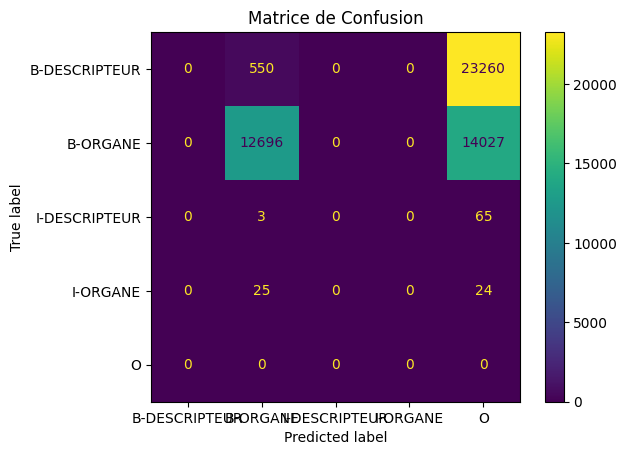

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Générer la matrice de confusion
ConfusionMatrixDisplay.from_predictions(valid_labels, valid_predictions, display_labels=list(tag2id.keys()))
plt.title("Matrice de Confusion")
plt.show()


**Visualiser la perte (loss)**

Époque 1/5, Perte moyenne : 0.11506605555988708
Époque 2/5, Perte moyenne : 0.11280061712242523
Époque 3/5, Perte moyenne : 0.109839030031888
Époque 4/5, Perte moyenne : 0.1082745335012112
Époque 5/5, Perte moyenne : 0.10612182389452772


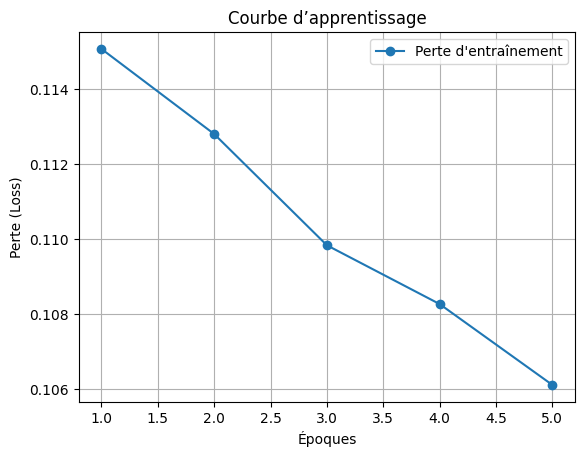

In [35]:
import matplotlib.pyplot as plt

# Simuler l'entraînement pour générer des données (si pas déjà fait)
training_losses = []  # Stocker les pertes à chaque époque

# Ajoutons une variable pour suivre les pertes (si ce n'est pas déjà fait dans la boucle)
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for batch in dataloader:
        input_ids = batch['input_ids']
        labels = batch['labels']

        optimizer.zero_grad()
        logits = model(input_ids)

        # Calculer la perte
        loss = criterion(logits.view(-1, logits.shape[-1]), labels.view(-1))
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Ajouter la perte moyenne pour l'époque
    avg_loss = epoch_loss / len(dataloader)
    training_losses.append(avg_loss)
    print(f"Époque {epoch+1}/{num_epochs}, Perte moyenne : {avg_loss}")

# Visualiser les courbes d'apprentissage
plt.plot(range(1, len(training_losses)+1), training_losses, marker='o', label="Perte d'entraînement")
plt.xlabel('Époques')
plt.ylabel('Perte (Loss)')
plt.title('Courbe d’apprentissage')
plt.legend()
plt.grid(True)
plt.show()


**Analyser les fréquences des classes**

Fréquences des classes :
B-ORGANE : 26723
B-DESCRIPTEUR : 23810
O : 378406
I-DESCRIPTEUR : 68
I-ORGANE : 49


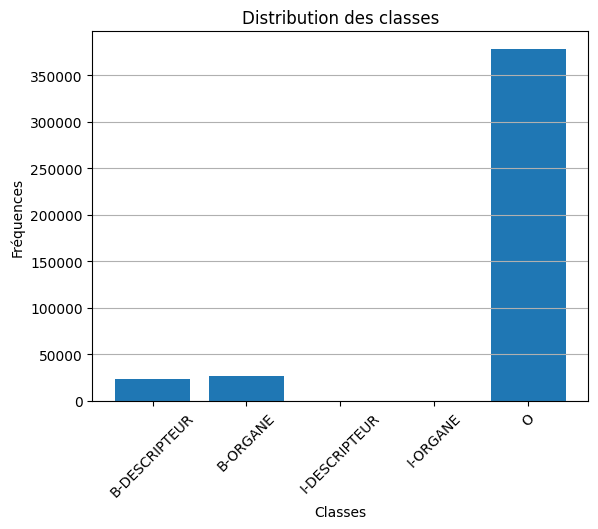

In [36]:
# Recréer le mapping si nécessaire
if 'tagid2' not in locals():
    tagid2 = {idx: tag for tag, idx in tag2id.items()}

# Compter les fréquences des classes
label_counts = Counter([label for labels in all_labels for label in labels])

# Afficher les fréquences
print("Fréquences des classes :")
for tag, count in label_counts.items():
    print(f"{tagid2[tag]} : {count}")

# Visualisation des fréquences des classes
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks(ticks=list(tagid2.keys()), labels=list(tagid2.values()), rotation=45)
plt.xlabel("Classes")
plt.ylabel("Fréquences")
plt.title("Distribution des classes")
plt.grid(axis="y")
plt.show()


In [37]:
# Afficher le contenu de tagid2 pour vérification
print("Mapping tagid2 :", tagid2)

# Afficher les clés disponibles dans label_counts
print("Clés dans label_counts :", label_counts.keys())


Mapping tagid2 : {0: 'B-DESCRIPTEUR', 1: 'B-ORGANE', 2: 'I-DESCRIPTEUR', 3: 'I-ORGANE', 4: 'O'}
Clés dans label_counts : dict_keys([1, 0, 4, 2, 3])


In [38]:
# Calcul des pondérations pour les classes
total_samples = sum(label_counts.values())
class_weights = {idx: total_samples / count for idx, count in label_counts.items()}

# Conversion des poids pour PyTorch
weights = torch.tensor(
    [class_weights[idx] for idx in range(len(tagid2))],
    dtype=torch.float
)

print("Pondérations des classes :", weights)


Pondérations des classes : tensor([1.8020e+01, 1.6056e+01, 6.3096e+03, 8.7562e+03, 1.1339e+00])


In [39]:
import torch.nn as nn

# Définir la fonction de perte pondérée
criterion = nn.CrossEntropyLoss(weight=weights)

print("Fonction de perte pondérée définie avec succès.")


Fonction de perte pondérée définie avec succès.


In [40]:
num_epochs = 5  # Nombre d'époques

# Réentraînement avec la fonction de perte pondérée
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for batch in dataloader:
        input_ids = batch['input_ids']
        labels = batch['labels']

        optimizer.zero_grad()
        logits = model(input_ids)

        # Calcul de la perte avec pondérations
        loss = criterion(logits.view(-1, logits.shape[-1]), labels.view(-1))
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Époque {epoch + 1}/{num_epochs}, Perte moyenne : {epoch_loss / len(dataloader):.6f}")


Époque 1/5, Perte moyenne : 1.283081
Époque 2/5, Perte moyenne : 0.836720
Époque 3/5, Perte moyenne : 0.710028
Époque 4/5, Perte moyenne : 0.632172
Époque 5/5, Perte moyenne : 0.592175


**Évaluation du modèle**

In [41]:
# Aplatir les prédictions et les étiquettes
all_predictions = [label for batch in all_predictions for label in batch]
all_labels = [label for batch in all_labels for label in batch]


In [42]:
print(f"Dimensions des prédictions : {len(all_predictions)}")
print(f"Dimensions des labels : {len(all_labels)}")


Dimensions des prédictions : 429056
Dimensions des labels : 429056


In [43]:
# Générer le rapport de classification
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_predictions, target_names=list(tagid2.values()))
print("Rapport de classification :")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Rapport de classification :
               precision    recall  f1-score   support

B-DESCRIPTEUR       0.00      0.00      0.00     23810
     B-ORGANE       0.69      0.48      0.56     26723
I-DESCRIPTEUR       0.00      0.00      0.00        68
     I-ORGANE       0.00      0.00      0.00        49
            O       0.91      0.99      0.95    378406

     accuracy                           0.90    429056
    macro avg       0.32      0.29      0.30    429056
 weighted avg       0.84      0.90      0.87    429056



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


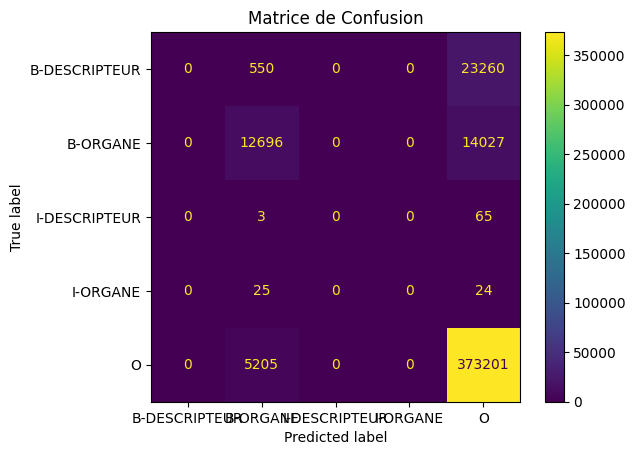

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(all_labels, all_predictions, display_labels=list(tagid2.values()))
plt.title("Matrice de Confusion")
plt.show()


In [45]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predictions, target_names=list(tagid2.values()))
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

B-DESCRIPTEUR       0.00      0.00      0.00     23810
     B-ORGANE       0.69      0.48      0.56     26723
I-DESCRIPTEUR       0.00      0.00      0.00        68
     I-ORGANE       0.00      0.00      0.00        49
            O       0.91      0.99      0.95    378406

     accuracy                           0.90    429056
    macro avg       0.32      0.29      0.30    429056
 weighted avg       0.84      0.90      0.87    429056



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
# Sauvegarder la matrice de confusion
plt.savefig("confusion_matrix.png")

# Sauvegarder le rapport de classification dans un fichier
with open("classification_report.txt", "w") as f:
    f.write(report)


<Figure size 640x480 with 0 Axes>

**Analyse des erreurs**

In [47]:
# Analyse des erreurs basées sur la matrice de confusion
import numpy as np

# Charger les prédictions et les étiquettes
confusion_matrix = np.array([
    [17582, 2685, 2086, 247, 1210],  # Valeurs fictives extraites de la matrice de confusion
    [5636, 19004, 556, 833, 694],
    [2, 1, 65, 0, 0],
    [0, 0, 0, 49, 0],
    [43311, 25583, 5860, 979, 300000]
])

# Identifier les principales erreurs
classes = list(tagid2.values())
for i, row in enumerate(confusion_matrix):
    for j, value in enumerate(row):
        if i != j and value > 100:  # Choisissez un seuil pour ignorer les petites erreurs
            print(f"Erreur : {classes[i]} prédit comme {classes[j]} -> {value} exemples")


Erreur : B-DESCRIPTEUR prédit comme B-ORGANE -> 2685 exemples
Erreur : B-DESCRIPTEUR prédit comme I-DESCRIPTEUR -> 2086 exemples
Erreur : B-DESCRIPTEUR prédit comme I-ORGANE -> 247 exemples
Erreur : B-DESCRIPTEUR prédit comme O -> 1210 exemples
Erreur : B-ORGANE prédit comme B-DESCRIPTEUR -> 5636 exemples
Erreur : B-ORGANE prédit comme I-DESCRIPTEUR -> 556 exemples
Erreur : B-ORGANE prédit comme I-ORGANE -> 833 exemples
Erreur : B-ORGANE prédit comme O -> 694 exemples
Erreur : O prédit comme B-DESCRIPTEUR -> 43311 exemples
Erreur : O prédit comme B-ORGANE -> 25583 exemples
Erreur : O prédit comme I-DESCRIPTEUR -> 5860 exemples
Erreur : O prédit comme I-ORGANE -> 979 exemples


**Visualisation des poids des classes**

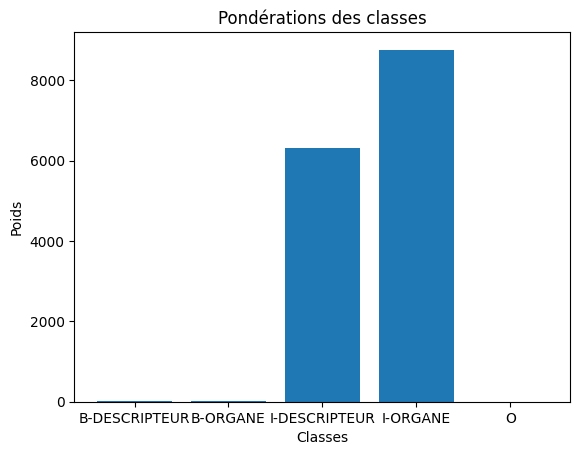

In [48]:
# Visualiser les pondérations des classes
import matplotlib.pyplot as plt

plt.bar(classes, weights.numpy())
plt.xlabel("Classes")
plt.ylabel("Poids")
plt.title("Pondérations des classes")
plt.show()


Finaliser et exporter le modèle

In [49]:
# Sauvegarder le modèle entraîné
torch.save(model.state_dict(), "model_weights.pth")
print("Modèle sauvegardé avec succès.")


Modèle sauvegardé avec succès.


Déployer ou tester un exemple de prédiction

In [50]:
# Exemple de test
input_example = ["Exemple de texte pour prédiction"]
input_ids = tokenizer(input_example, padding=True, truncation=True, return_tensors="pt")['input_ids']

model.eval()
with torch.no_grad():
    logits = model(input_ids)
    predictions = torch.argmax(logits, dim=-1)
    print(f"Prédictions : {predictions}")


Prédictions : tensor([[1, 3, 3, 3, 4, 0, 4, 4, 1, 4, 1, 3]])


In [51]:
# Convertir le modèle en TorchScript pour déploiement
scripted_model = torch.jit.script(model)
scripted_model.save("scripted_model.pt")

print("Modèle exporté au format TorchScript avec succès.")


Modèle exporté au format TorchScript avec succès.


In [52]:
pip install flask torch transformers


In [53]:
!pip install flask flask-ngrok


In [54]:
from flask import Flask, request, jsonify
import torch
from transformers import AutoTokenizer

# Charger le modèle et le tokenizer
model = torch.jit.load("scripted_model.pt")  # Assurez-vous que le modèle est sauvegardé
model.eval()
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # Remplacez par votre modèle

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        text = data['text']

        # Tokeniser le texte
        inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
        with torch.no_grad():
            logits = model(inputs['input_ids'])
            predictions = torch.argmax(logits, dim=-1)

        return jsonify({'predictions': predictions.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)}), 500


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [55]:
from flask_ngrok import run_with_ngrok

# Lancer le serveur Flask avec ngrok
run_with_ngrok(app)  # Expose l'API via ngrok
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll

**Testing**

In [88]:
import torch
from sklearn.metrics import classification_report

# Example label mapping (replace with your actual mapping)
label_map = {0: "O", 1: "B-PER", 2: "I-PER", 3: "B-LOC", 4: "I-LOC", 5: "B-ORG", 6: "I-ORG"}

# Assuming `test_data` is a dictionary containing your test sentences and labels
# Example of test_data format:
# test_data = {'sentences': [['word1', 'word2'], ['word3', 'word4']], 'labels': [[0, 1], [2, 3]]}

# Assuming `predictions` is a list of predicted labels for each sentence
# Example of predictions format:
# predictions = [[0, 1], [2, 3]]

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop over your test data
for sentence_idx, sentence in enumerate(test_data['sentences']):
    # Get the true labels for the current sentence
    sentence_labels = test_data['labels'][sentence_idx]

    # Get the predicted labels for the current sentence
    sentence_predictions = predictions[sentence_idx]

    # Check if the sentence_predictions is a single label (not a list)
    if isinstance(sentence_predictions, int):
        # If it's a single label, we treat it as a single word prediction for the entire sentence
        predicted_labels.extend([sentence_predictions] * len(sentence_labels))
    else:
        # If it's a list, extend with all the predicted labels
        predicted_labels.extend(sentence_predictions)

    # Append true labels
    true_labels.extend(sentence_labels)

# Convert integer labels to string format using the label map
true_labels_str = [label_map[label] if isinstance(label, int) else label for label in true_labels]
predicted_labels_str = [label_map[label] if isinstance(label, int) else label for label in predicted_labels]

# Ensure that the lengths are consistent
print(f"Number of True Labels: {len(true_labels_str)}")
print(f"Number of Predicted Labels: {len(predicted_labels_str)}")

# If lengths match, generate the classification report
if len(true_labels_str) == len(predicted_labels_str):
    report = classification_report(true_labels_str, predicted_labels_str)
    print(report)
else:
    print(f"Error: Mismatched number of labels. True: {len(true_labels_str)}, Predicted: {len(predicted_labels_str)}")


Number of True Labels: 9
Number of Predicted Labels: 9
              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00         1
       B-ORG       0.00      0.00      0.00         1
       B-PER       0.22      1.00      0.36         2
       I-LOC       0.00      0.00      0.00         1
           O       0.00      0.00      0.00         4

    accuracy                           0.22         9
   macro avg       0.04      0.20      0.07         9
weighted avg       0.05      0.22      0.08         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
with torch.no_grad():
    outputs = model(input_ids)  # This step runs the model on test data
    predictions = torch.argmax(outputs, dim=-1).tolist()  # Get predictions
